In [1]:
import numpy as np
import pandas as pd

In [2]:
df=pd.read_csv('Car.csv')

In [3]:
df=df.dropna()

In [4]:
#SEATS
df['seats'].value_counts()

5.0     6254
7.0     1120
8.0      235
4.0      133
9.0       80
6.0       62
10.0      19
2.0        2
14.0       1
Name: seats, dtype: int64

In [5]:
# TORQUE
df['torque']
# we cannot simplify it so have to drop it
df=df.drop(columns='torque')
df=df.reset_index(drop=True)

In [6]:
#MAXPOWER
df['max_power']=df['max_power'].apply(lambda x:x.split()[0])
# df['max_power']=df['max_power'].astype('float64')                       # error is being shown
# because entries have some incorect values in dataset.
ind=[]
for i in range(len(df)):
    try:
        float(df.loc[i,'max_power'])                                    #type:ignore
    except:
        ind.append(i)
df=df.drop(index=ind)
df=df.reset_index(drop=True)
df['max_power']=df['max_power'].astype('float64')

In [7]:
# ENGINE
df['engine']=df['engine'].apply(lambda x:x.split()[0])
# df['engine']=df['engine'].astype('float64')                       # error is being shown
# because entries have some incorect values in dataset.
ind=[]
for i in range(len(df)):
    try:
        float(df.loc[i,'engine'])                                    #type:ignore
    except:
        ind.append(i)
df=df.drop(index=ind)
df=df.reset_index(drop=True)
df['engine']=df['engine'].astype('float64')

In [8]:
#MILEAGE
df['mileage']=df['mileage'].apply(lambda x:x.split()[0])
df['mileage']=df['mileage'].astype('float64')

In [9]:
# # OWNER
df['owner'].value_counts()
df['owner']=df['owner'].replace({'Fifth' :'Fourth & Above Owner'})
df['owner'].value_counts()

First Owner             5214
Second Owner            2015
Third Owner              510
Fourth & Above Owner     160
Test Drive Car             5
Name: owner, dtype: int64

In [10]:
f=df['owner']=='Test Drive Car'
df=df.drop(index=df[f].index)
df=df.reset_index(drop=True)

In [11]:
#TRANSMISSION
df['transmission'].value_counts()

Manual       6862
Automatic    1037
Name: transmission, dtype: int64

In [12]:
#FUEL
df['fuel'].value_counts()

Diesel    4298
Petrol    3514
CNG         52
LPG         35
Name: fuel, dtype: int64

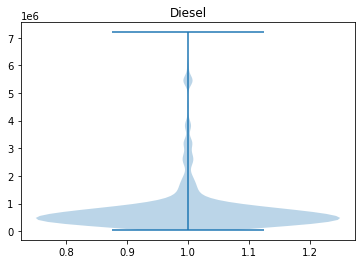

In [13]:
import matplotlib.pyplot as plt
plt.violinplot(df.loc[df['fuel']=='Diesel','selling_price'])
plt.title('Diesel')
plt.show()

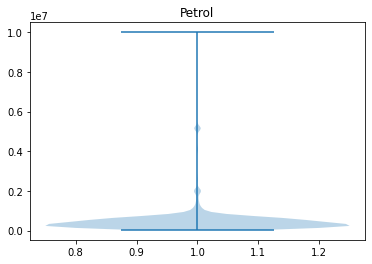

In [14]:
plt.violinplot(df.loc[df['fuel']=='Petrol','selling_price'])
plt.title('Petrol')
plt.show()

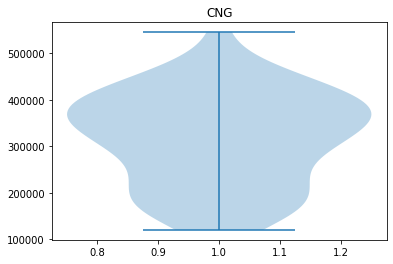

In [15]:
plt.violinplot(df.loc[df['fuel']=='CNG','selling_price'])
plt.title('CNG')
plt.show()

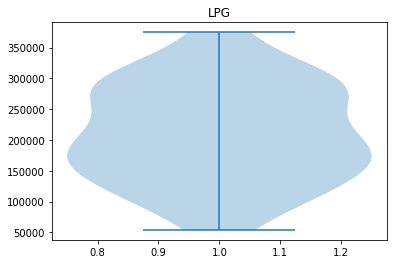

In [16]:
plt.violinplot(df.loc[df['fuel']=='LPG','selling_price'])
plt.title('LPG')
plt.show()

In [17]:
df['fuel']=df['fuel'].replace({'Petrol':0,'Diesel':0,'CNG':1,'LPG':1})
# We do this because of same distribution of Categories.

In [18]:
# Categorical ---->  dependent
# Numeric   ---->scatter
# Categorical -----> check ratio of each category in one column to another column.

In [19]:
df['name']=df['name'].apply(lambda x:x.split()[0]+' '+ x.split()[1])
df['name'].value_counts()

Maruti Swift     729
Maruti Alto      418
Hyundai i20      341
Maruti Wagon     281
Toyota Innova    235
                ... 
Tata Winger        1
Opel Astra         1
Ashok Leyland      1
BMW X7             1
Volvo XC90         1
Name: name, Length: 200, dtype: int64

In [20]:
df['name']=df['name'].apply(lambda x:x.split()[0])
df['name'].value_counts()

Maruti           2366
Hyundai          1359
Mahindra          758
Tata              719
Honda             465
Toyota            452
Ford              388
Chevrolet         230
Renault           228
Volkswagen        184
BMW               118
Skoda             104
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               41
Audi               37
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Name: name, dtype: int64

In [21]:
# Make graph of 10 brand selling price(selling)

In [22]:
groups=df.groupby(by='name')
mean_prices=groups['selling_price'].mean().sort_values(ascending=False)

In [23]:
# 16  31      2

# 6   16      1

# 0  5       0

In [24]:
for i in range(len(df)):
    if df.loc[i,'name'] in mean_prices[16:31]:
        df.loc[i,'name']=2
    elif df.loc[i,'name'] in mean_prices[5:16]:
        df.loc[i,'name']=1
    else:
        df.loc[i,'name']=0
        
df['name']=df['name'].astype('int32')  

In [25]:
# Important   Feature selection
# Independent   Dependent
# Numeric       Numeric                 Pearson Correlation
# Numeric       Categorical             Anova F value(Analysis of Variance)
# Categorical   Numeric                 Anova F value(Analysis of Variance)
# Categorical   Categorical             Chi Square Test

In [26]:
numeric = df[['year','selling_price','km_driven','mileage','engine','max_power']]
categorical = df[['name','seller_type','transmission','owner','seats']]

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
lo=LabelEncoder()
categorical['owner']=le.fit_transform(categorical['owner'])
categorical['transmission']=lo.fit_transform(categorical['transmission'])

<ipython-input-27-c60ae8a9e654>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['owner']=le.fit_transform(categorical['owner'])
<ipython-input-27-c60ae8a9e654>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical['transmission']=lo.fit_transform(categorical['transmission'])


In [28]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct=ColumnTransformer([('encode',OneHotEncoder(),[1])],remainder='passthrough')
categorical=ct.fit_transform(categorical)

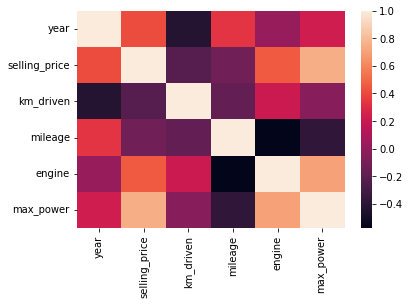

In [29]:
import seaborn as sns
corr=numeric.corr()
sns.heatmap(corr)
plt.show()

In [31]:
#correlation ----> tells amount of relation between 2 columns and its direction
# if corr value is vey low (eg -- 0.0001)   -------> drop it.

In [32]:
# chi square test 
# categorical   numeric   --- Anova test

In [33]:
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest ---> algorithm apply ----> top n columns.
select=SelectKBest(f_classif,k=categorical.shape[1])
X_new=select.fit_transform(categorical,numeric['selling_price'])
select.scores_

array([ 7.28246783,  6.988322  ,  6.69782293, 14.71528404, 12.03276301,
        3.40499271,  2.66180735])

In [36]:
# seats in car
# Step 1
# 5 ----> selling price(sum of square(average)) s1          distance of every point from center Eucledian
# 7 ---->  s2
# 10 ----> s3
# Step 2
# Degree of freedom     ----> total no. of independent points.
# Step 3 
# v1   -----> s1+s2+s3/3/dof
# v2   -----> sum of squarer within groups              dof---->2
# Step 4
# v1/v2     ----> F value
# F value if categories are independent or not

In [35]:
# Hypothesis test ------> we assume
# H0: p_value < 0.05     Both columns is independenet
# H1: p_value > 0.05     Both columns is dependent

In [37]:
# Outliers
# First case ----> Data follows Normal Distribution         ----> Z-score, IQR Curve
# Second case ----> Data follows Non-Gaussian Distribution  ----> DBSCAN Density Based Spatial Clustering Application for Noise

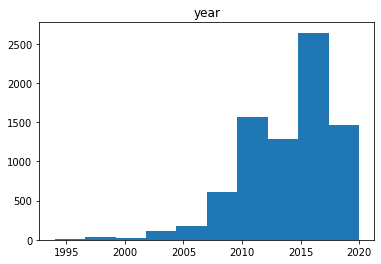

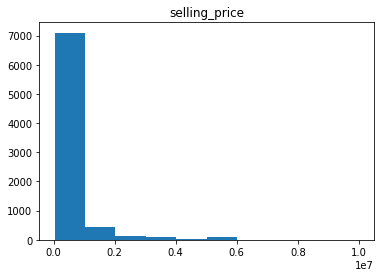

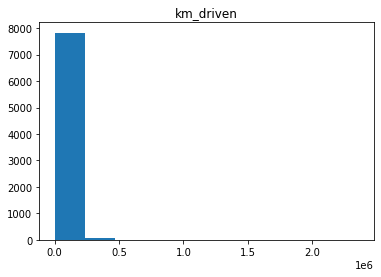

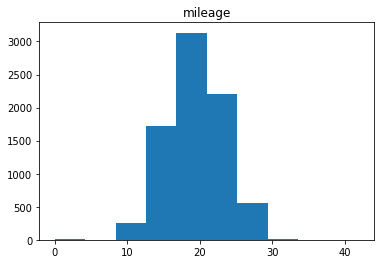

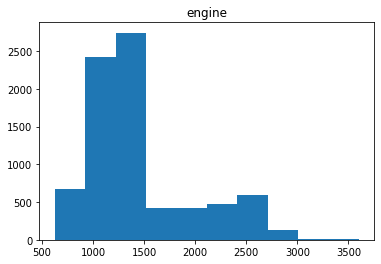

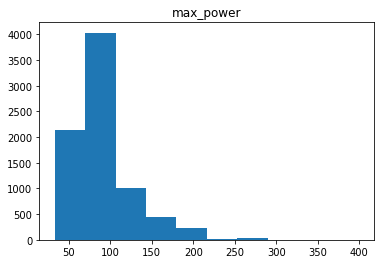

In [38]:
for x in numeric.columns:
    plt.hist(numeric[x])
    plt.title(x)
    plt.show()

In [40]:
#  if our data is normal distribution then our 99% data is lying in first 3 std deviation

In [41]:
# z score 
# x - xmean/std dev
# z score tells us where our data is lying in which std dev
# if comes greater than 3 then it is outlier

In [45]:
def zscore(x):
    mean=np.mean(x)
    std=np.std(x)
    z=(x-mean)/std
    z=z.abs()
    return x[z>3]
outliers1=zscore(numeric['mileage'])
outliers2=zscore(numeric['km_driven'])
outliers3=zscore(numeric['max_power'])

In [47]:
# Remove outliers from last data

In [58]:
# do min max scaling before dbscan

In [69]:
from sklearn.preprocessing import MinMaxScaler
minmax=MinMaxScaler()
data=minmax.fit_transform(numeric[['engine','selling_price']])
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(data)

dis,ind=nbrs.kneighbors(data)
dis=np.sort(dis,axis=0)
dis=dis[:,1]

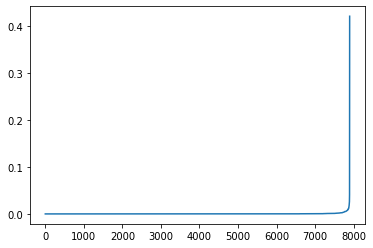

In [73]:
plt.plot(dis)
plt.show()

In [70]:
# DBSCAN
from sklearn.cluster import DBSCAN
model=DBSCAN(eps=0.08,min_samples=10).fit(data)
model.labels_

array([0, 0, 0, ..., 0, 0, 0])

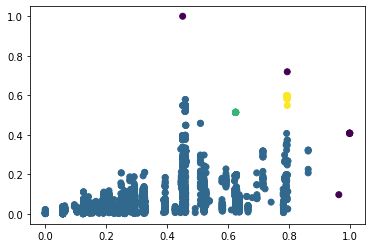

In [71]:
plt.scatter(data[:,0],data[:,1],c=model.labels_)
plt.show()

In [72]:
outliers4=data[model.labels_==-1]

In [74]:
#Join mumeric and caterical data
#Remove outliers
#Seprate independent and dependent
# Scale
# Training
# Testing
# Prediction